## Regression Miniproject

This miniproject is for groups of size 2.

Find a dataset appropriate for regression analysis and, well, analyze it using regression:
- Identify the input variables and the output variable. For simplicity, ignore categorical variables in your data. Also if one of the variables that you care about has invalid values in a row (e.g., '?' or nan), discard that row. Your dataset should be such that after this step you have at least 4 input variables.
- Find the (distribution of the) coefficients $\theta$, assuming the sum of squares of errors as your cost function.
- Identify which 2 input variables give the smallest error.
- Explore the effect of regularization, Bayesian priors, and/or find other ways to explore the various aspects of your analysis.
- Is there anything that your analysis tells you that you did not know before?

Some possible sources for data:
- [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets.html?task=reg)
- [Scraping the web with beautifulsoup](https://www.crummy.com/software/BeautifulSoup/)
- [Kaggle](https://www.kaggle.com/datasets)

**Your team must submit the following:**
- Submit any code you write, either in this notebook or as a seprate file.
- Summarize your work in 1-3 slides in this [Google Presenation](https://docs.google.com/presentation/d/1ex42K00I8ryQr5ed8ZrXNZKUr8wd3I4vaFSfv0VKrRo/edit?usp=sharing). All groups will add their work to the same presenation and so everyone can see work done by others. You should be able to present your slides in 2 minutes.

- You can see the work from the previous class [here](https://docs.google.com/presentation/d/1iu0U8tsVq0maIAscd_tzvWxB2avyG0sBLMkydALegxo/edit?usp=sharing). But please not that this year we covered regression in more depth and this should be reflected in your submissions.


**Grading:**
- This miniproject has weight equal to a regular lab.
- 75% of the grade will be based on my evaluation of your work.
- 25% of the grade will be based on peer evaluation (more instructions will be provided later).

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.stats as st
import scipy.linalg as la
from math import sqrt
import pandas as pd
from pandas import DataFrame
import re
print("Modules Imported!")

Modules Imported!


In [0]:
# http://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set
df = pd.read_excel('Real estate valuation data set.xlsx')

In [0]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [0]:
X = df.values[:, 1:7]
Y = df.values[:, 7]

In [0]:
# normalize X and Y
X_n = (X - X.mean(axis=0)) / X.std(axis=0)
Y_n = (Y - Y.mean()) / Y.std()

## Univariate Regression

In [28]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

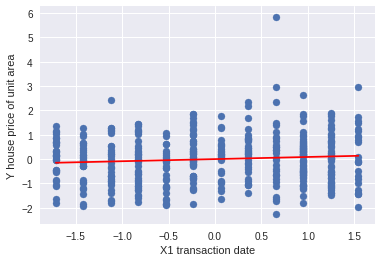

θ = 0.0875, rmse = 0.9962



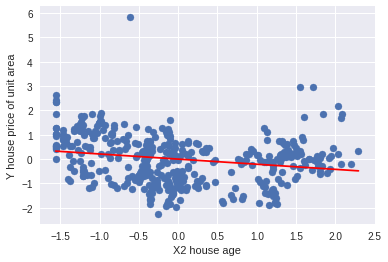

θ = -0.2106, rmse = 0.9776



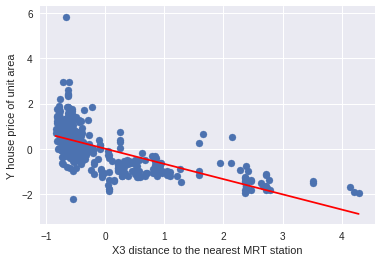

θ = -0.6736, rmse = 0.7391



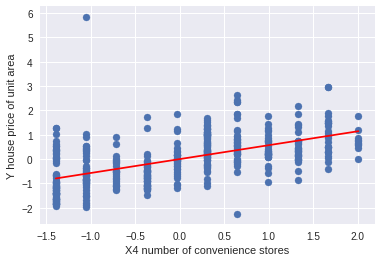

θ = 0.5710, rmse = 0.8209



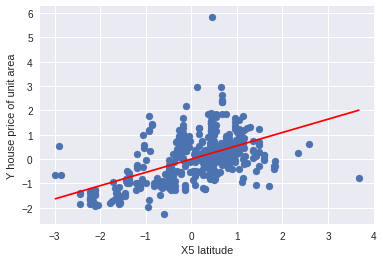

θ = 0.5463, rmse = 0.8376



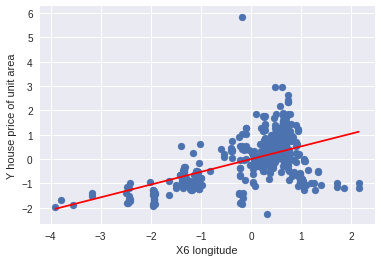

θ = 0.5233, rmse = 0.8522



In [31]:
for i, X_ni in enumerate(X_n.T):
  x_name = df.columns[i+1]
  y_name = df.columns[-1]
  
  θ = 1 / (X_ni @ X_ni) * (X_ni @ Y_n)
  rmse = np.sqrt(np.mean(np.power(Y_n - X_ni * θ, 2)))
  X_dummy = np.array([X_ni.min(), X_ni.max()])
  
  plt.scatter(X_ni, Y_n)
  plt.plot(X_dummy, X_dummy * θ, 'r')
  plt.xlabel(x_name)
  plt.ylabel(y_name)
  plt.show()
  print(f'θ = {θ:.4f}, rmse = {rmse:.4f}')
  print()

## Multivariate Bayesian Regression

In [0]:
K_b = la.inv(X_n.T @ X_n)
θ_b = K_b @ X_n.T @ Y_n

In [0]:
θ_b, K_b.diagonal()

(array([ 0.10671371, -0.22581256, -0.41625196,  0.24534464,  0.20564666,
        -0.01401913]),
 array([0.00245086, 0.00244997, 0.01044199, 0.00390585, 0.00388943,
        0.00706837]))

In [0]:
np.array([np.sqrt(np.mean(np.power(Y_n - X_n[:, i] * θ_b[i], 2))) for i in range(6)])

array([0.99634666, 0.97769829, 0.78261124, 0.88318062, 0.90421141,
       1.00740686])

In [0]:
def msre(θ):
  return np.sqrt(np.mean(np.power(Y_n - X_n @ θ, 2)))
msre(θ_b)

0.6462313480595928

In [0]:
def regularized(λ=0.0):
  return la.inv(X_n.T @ X_n + λ * np.eye(6)) @ X_n.T @ Y_n

msre(regularized())

0.6462313480595928

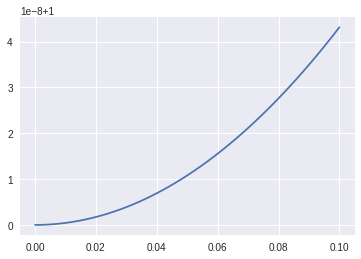

In [0]:
λs = np.linspace(0, 0.1, 51)
plt.plot(λs, np.array([msre(regularized(λ)) for λ in λs]) / msre(regularized(0)))
plt.show()

## Old Single-Variable Code

Probably not necessary: https://piazza.com/class/jqpvykt1gbq4gf?cid=47

In [0]:
eX1, X2, X3, X4, X5, X6, Y = df.values[:, 1], df.values[:, 2], df.values[:, 3], df.values[:, 4], df.values[:, 5], df.values[:, 6], df.values[:, 7]
X1.shape, Y.shape

((414,), (414,))

In [0]:
K_b = 1 / (X1.T @ X1)
theta_b = K_b * X1.T @ Y

In [0]:
theta_b

0.018866144432396717

In [0]:
K_b

5.96002156510839e-10

[]

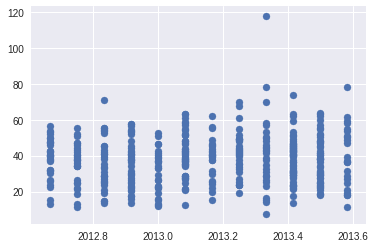

In [0]:
plt.scatter(X1, Y)
plt.plot()

In [0]:
rmse_x1 = np.sqrt(((X1 * theta_b[0] - Y) ** 2).mean())

print('theta*=', theta_b)
print('RMSE =', rmse_x1)
#plt.scatter(X,Y)
#plt.plot(X,theta[0,0]*X,color='red')
#plt.figure()